# Minimal example of a Caleb dataset - RT And(B) a detached system
Exercise Exercises_02_forward_models #2
we could set more parameters, we jsut set what we need.  We also ignore the spots
but we run the forward model here

In [1]:
import phoebe
from phoebe import u # units
import numpy as np

In [2]:
logger = phoebe.logger(clevel='INFO')
Period = 0.6289294 #days
MASS_RATIO = 0.740000
TEMPERATURE_1 = 6150.000000 #K
TEMPERATURE_2 = 4920.000000 #K
INCLINATION = 82.00000 #deg
ECCENTRICITY = 0.0
OMEGA_1 = 3.918202
OMEGA_2 = 3.898896
ROTATION_F1 = 1
ROTATION_F2 = 1

from Caleb radial velocity data for this system we have K1 and K2 and can determin that the sma of the binary is 3.8671 SolRad

In [3]:
sma = 3.8671

In [4]:
b = phoebe.Bundle.default_binary()

Thu, 17 Jun 2021 11:00 BUNDLE       INFO    attempting to update compute='phoebe01' to new version requirements
Thu, 17 Jun 2021 11:00 BUNDLE       INFO    adding phoebe 'phoebe01' compute to bundle


In [5]:
d = 1 - ECCENTRICITY
requiv_1Dist = phoebe.distortions.roche.pot_to_requiv(OMEGA_1, sma, MASS_RATIO, ROTATION_F1, d, component=1)
requiv_2Dist = phoebe.distortions.roche.pot_to_requiv(OMEGA_2, sma, MASS_RATIO, ROTATION_F2, d, component=2)
b.set_value('requiv@primary', requiv_1Dist)
b.set_value('requiv@secondary', requiv_2Dist)

In [6]:
b.set_value('incl@orbit', INCLINATION)
b.set_value('period@binary', Period)
b.set_value('q@binary@component',MASS_RATIO)
b.set_value('teff@primary', TEMPERATURE_1)
b.set_value('teff@secondary', TEMPERATURE_2)
b.set_value('ecc@binary@orbit', ECCENTRICITY )
b.set_value('sma@binary', sma )

Just to see how close r_back*sma is to requiv

In [7]:
b.get_value('requiv@primary')

1.2417329731421782

In [8]:
b.get_value('requiv@secondary')

1.0510956297799288

In [9]:
b.add_dataset('lc', compute_times=phoebe.linspace(0,10,101), dataset='lc01')
b.add_dataset('rv', compute_times=phoebe.linspace(0,10,101), dataset='rv01')

Thu, 17 Jun 2021 11:00 BUNDLE       INFO    calling add_figure(kind='dataset.lc') since auto_add_figure@setting=True
Thu, 17 Jun 2021 11:00 BUNDLE       INFO    calling add_figure(kind='dataset.rv') since auto_add_figure@setting=True


<ParameterSet: 81 parameters | contexts: figure, dataset, constraint, compute>

In [10]:
b.run_compute()

Thu, 17 Jun 2021 11:00 BUNDLE       INFO    run_compute: computing necessary ld_coeffs, pblums, l3s
Thu, 17 Jun 2021 11:00 PASSBANDS    INFO    loading Bolometric:900-40000 passband from /usr/local/lib/python3.8/dist-packages/phoebe/atmospheres/tables/passbands/bolometric.fits (including all tables)
Thu, 17 Jun 2021 11:00 BUNDLE       INFO    logarithmic ld_coeffs lookup for dataset='None' component='primary' passband='Bolometric:900-40000' from ld_coeffs_source='ck2004'
Thu, 17 Jun 2021 11:00 BUNDLE       INFO    interpolated logarithmic ld_coeffs_bol=[0.71025499 0.28448645]
Thu, 17 Jun 2021 11:00 BUNDLE       INFO    logarithmic ld_coeffs lookup for dataset='None' component='secondary' passband='Bolometric:900-40000' from ld_coeffs_source='ck2004'
Thu, 17 Jun 2021 11:00 BUNDLE       INFO    interpolated logarithmic ld_coeffs_bol=[0.71285805 0.29743328]
Thu, 17 Jun 2021 11:00 BUNDLE       INFO    logarithmic ld_coeffs lookup for dataset='None' component='primary' passband='Bolometric:

<ParameterSet: 7 parameters | kinds: lc, rv>

In [11]:
requiv_1Dist

1.2417329731421782

Thu, 17 Jun 2021 11:00 PARAMETERS   INFO    calling autofig.plot(dataset=None, model=None, x=<data ((101,) unit=d)>, xlabel=time, xqualifier=times, y=<data ((101,) unit=W / m2)>, ylabel=flux, yqualifier=fluxes, z=0, i=<data ((101,) unit=d)>, iqualifier=times, marker=none, label=lc01)
Thu, 17 Jun 2021 11:00 PARAMETERS   INFO    calling autofig.plot(dataset=None, model=None, x=<data ((101,) unit=d)>, xlabel=time, xqualifier=times, y=<data ((101,) unit=km / s)>, ylabel=rv, yqualifier=rvs, z=0, i=<data ((101,) unit=d)>, iqualifier=times, marker=none, label=primary@rv01)
Thu, 17 Jun 2021 11:00 PARAMETERS   INFO    calling autofig.plot(dataset=None, model=None, x=<data ((101,) unit=d)>, xlabel=time, xqualifier=times, y=<data ((101,) unit=km / s)>, ylabel=rv, yqualifier=rvs, z=0, i=<data ((101,) unit=d)>, iqualifier=times, marker=none, label=secondary@rv01)
Thu, 17 Jun 2021 11:00 PARAMETERS   INFO    calling autofig.draw(i=None, draw_sidebars=False, draw_title=False, tight_layout=False, save=

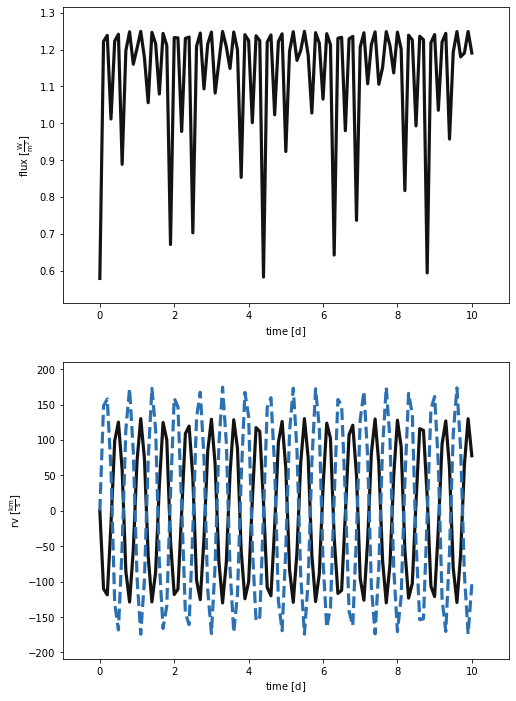

In [12]:
_ = b.plot(show=True)

Thu, 17 Jun 2021 11:00 PARAMETERS   INFO    calling autofig.plot(x=<data ((101,) unit=)>, dataset=None, model=None, xlabel=phase, xqualifier=phase, linebreak=x-, y=<data ((101,) unit=W / m2)>, ylabel=flux, yqualifier=fluxes, z=0, i=x, iqualifier=None, marker=none, label=lc01)
Thu, 17 Jun 2021 11:00 PARAMETERS   INFO    calling autofig.plot(x=<data ((101,) unit=)>, dataset=None, model=None, xlabel=phase, xqualifier=phase, linebreak=x-, y=<data ((101,) unit=km / s)>, ylabel=rv, yqualifier=rvs, z=0, i=x, iqualifier=None, marker=none, label=primary@rv01)
Thu, 17 Jun 2021 11:00 PARAMETERS   INFO    calling autofig.plot(x=<data ((101,) unit=)>, dataset=None, model=None, xlabel=phase, xqualifier=phase, linebreak=x-, y=<data ((101,) unit=km / s)>, ylabel=rv, yqualifier=rvs, z=0, i=x, iqualifier=None, marker=none, label=secondary@rv01)
Thu, 17 Jun 2021 11:00 PARAMETERS   INFO    calling autofig.draw(i=None, draw_sidebars=False, draw_title=False, tight_layout=False, save=False, show=True)


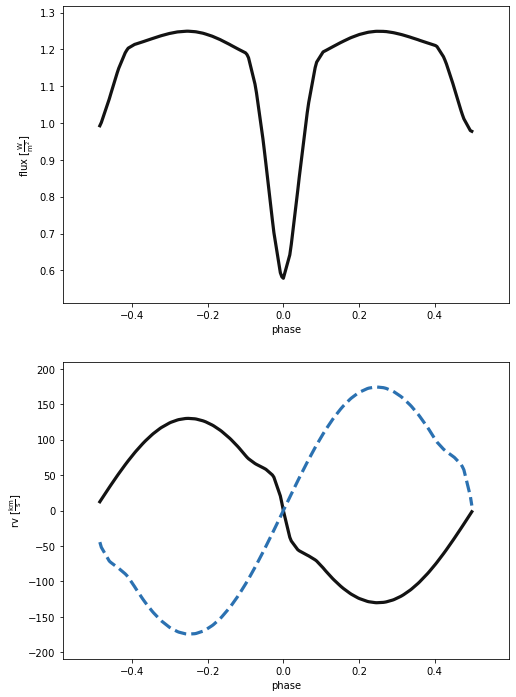

In [13]:
_ = b.plot(x = 'phase', show=True)